In [2]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [6]:
state_df = pd.read_csv('StatewiseTestingDetails.csv')
country_df = pd.read_csv('covid_19_india.csv')

In [7]:
state_df.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [8]:
state_df.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [9]:
state_df[state_df['State']=='Tamil Nadu'].head()

,Date,State,TotalSamples,Negative,Positive
12492,2020-04-03,Tamil Nadu,3684.0,2789,411.0
12493,2020-04-08,Tamil Nadu,5305.0,4414,690.0
12494,2020-04-09,Tamil Nadu,7267.0,5824,834.0
12495,2020-04-10,Tamil Nadu,8410.0,6838,911.0
12496,2020-04-11,Tamil Nadu,9842.0,7779,969.0


In [10]:
country_df[((country_df['Date']=='2020-03-30')&(country_df['State/UnionTerritory']=='Tamil Nadu'))]

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
495,496,2020-03-30,9:30 PM,Tamil Nadu,-,-,4,1,67


In [12]:
df=country_df.copy()

In [13]:
def drop_star(df):
    for i in df['State/UnionTerritory'].iteritems():
        if i[1][-3:] == "***":
            df.drop(i[0],inplace=True)
        
drop_star(df)
df['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli',
       'Himanchal Pradesh', 'Karanataka'], dtype=object)

In [14]:
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')
df.drop(['Time'],axis=1, inplace=True)
df.rename(columns={'State/UnionTerritory':'States'}, inplace=True)

In [15]:
df['Active_cases']=df['Confirmed']-(df['Cured']+df['Deaths'])
df['Discharge_Rate'] = np.round((df['Cured']/df['Confirmed'])*100, decimals = 4)
df['Death_Rate'] = np.round((df['Deaths']/df['Confirmed'])*100, decimals = 4)
df.head()

,Sno,Date,States,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active_cases,Discharge_Rate,Death_Rate
0,1,2020-01-30,Kerala,1,0,0,0,1,1,0.0,0.0
1,2,2020-01-31,Kerala,1,0,0,0,1,1,0.0,0.0
2,3,2020-02-01,Kerala,2,0,0,0,2,2,0.0,0.0
3,4,2020-02-02,Kerala,3,0,0,0,3,3,0.0,0.0
4,5,2020-02-03,Kerala,3,0,0,0,3,3,0.0,0.0


In [16]:
df[df['States']=='Tamil Nadu'].tail()

,Sno,Date,States,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active_cases,Discharge_Rate,Death_Rate
17636,17637,2021-07-29,Tamil Nadu,-,-,2498289,33995,2553805,21521,97.8261,1.3312
17672,17673,2021-07-30,Tamil Nadu,-,-,2500434,34023,2555664,21207,97.8389,1.3313
17708,17709,2021-07-31,Tamil Nadu,-,-,2502627,34050,2557611,20934,97.8502,1.3313
17744,17745,2021-08-01,Tamil Nadu,-,-,2504805,34076,2559597,20716,97.8594,1.3313
17780,17781,2021-08-02,Tamil Nadu,-,-,2506961,34102,2561587,20524,97.8675,1.3313


In [17]:
df[df['States']=='Maharashtra'].tail()

,Sno,Date,States,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active_cases,Discharge_Rate,Death_Rate
17626,17627,2021-07-29,Maharashtra,-,-,6064856,132145,6282914,85913,96.5293,2.1032
17662,17663,2021-07-30,Maharashtra,-,-,6075888,132335,6290156,81933,96.5936,2.1038
17698,17699,2021-07-31,Maharashtra,-,-,6083319,132566,6296756,80871,96.6104,2.1053
17734,17735,2021-08-01,Maharashtra,-,-,6090786,132791,6303715,80138,96.6222,2.1066
17770,17771,2021-08-02,Maharashtra,-,-,6094896,132948,6310194,82350,96.5881,2.1069


In [18]:
df[df['States']=='West Bengal'].tail()

,Sno,Date,States,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active_cases,Discharge_Rate,Death_Rate
17641,17642,2021-07-29,West Bengal,-,-,1496294,18109,1525773,11370,98.0679,1.1869
17677,17678,2021-07-30,West Bengal,-,-,1497116,18123,1526539,11300,98.0726,1.1872
17713,17714,2021-07-31,West Bengal,-,-,1497951,18128,1527250,11171,98.0816,1.1870
17749,17750,2021-08-01,West Bengal,-,-,1498770,18136,1528019,11113,98.0858,1.1869
17785,17786,2021-08-02,West Bengal,-,-,1499597,18149,1528720,10974,98.0949,1.1872


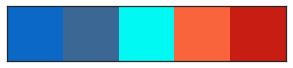

In [19]:
import matplotlib.pyplot as plt
import matplotlib.dates as mtd
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
colors=['#0C68C7','#3A6794','#00FAF3','#FA643C','#C71D12']
sns.set(palette=colors, style='white')

sns.palplot(colors)

In [24]:
current = df[df.Date == '2021-07-06']

In [25]:
max_confirmed_cases = current.sort_values(by='Confirmed', ascending = False)
max_confirmed_cases.head()

,Sno,Date,States,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active_cases,Discharge_Rate,Death_Rate
16798,16799,2021-07-06,Maharashtra,-,-,5861720,123136,6104917,120061,96.0164,2.0170
16794,16795,2021-07-06,Kerala,-,-,2866806,13818,2981721,101097,96.1460,0.4634
16793,16794,2021-07-06,Karnataka,-,-,2779038,35434,2856491,42019,97.2885,1.2405
16808,16809,2021-07-06,Tamil Nadu,-,-,2432017,33059,2500002,34926,97.2806,1.3224
16779,16780,2021-07-06,Andhra Pradesh,-,-,1858189,12870,1905023,33964,97.5416,0.6756


In [26]:
top_cases = max_confirmed_cases[:10]
top_cases.head()

,Sno,Date,States,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active_cases,Discharge_Rate,Death_Rate
16798,16799,2021-07-06,Maharashtra,-,-,5861720,123136,6104917,120061,96.0164,2.0170
16794,16795,2021-07-06,Kerala,-,-,2866806,13818,2981721,101097,96.1460,0.4634
16793,16794,2021-07-06,Karnataka,-,-,2779038,35434,2856491,42019,97.2885,1.2405
16808,16809,2021-07-06,Tamil Nadu,-,-,2432017,33059,2500002,34926,97.2806,1.3224
16779,16780,2021-07-06,Andhra Pradesh,-,-,1858189,12870,1905023,33964,97.5416,0.6756


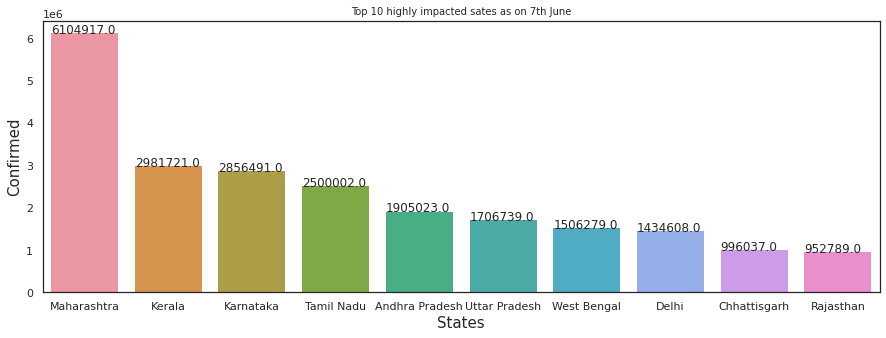

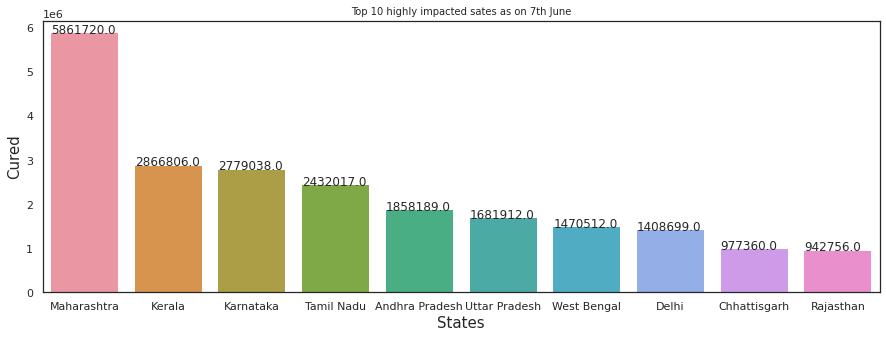

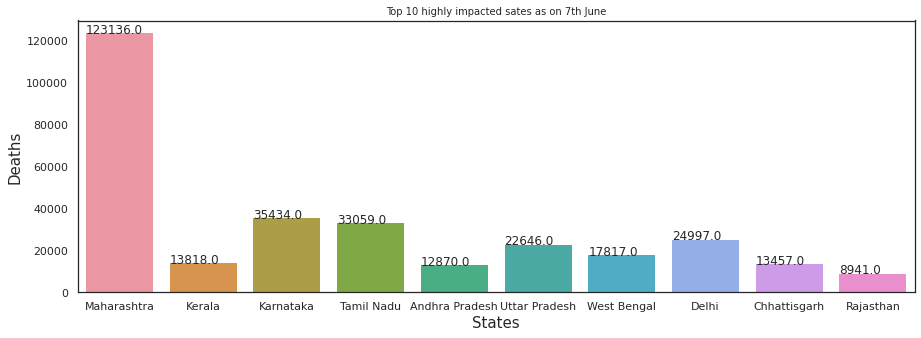

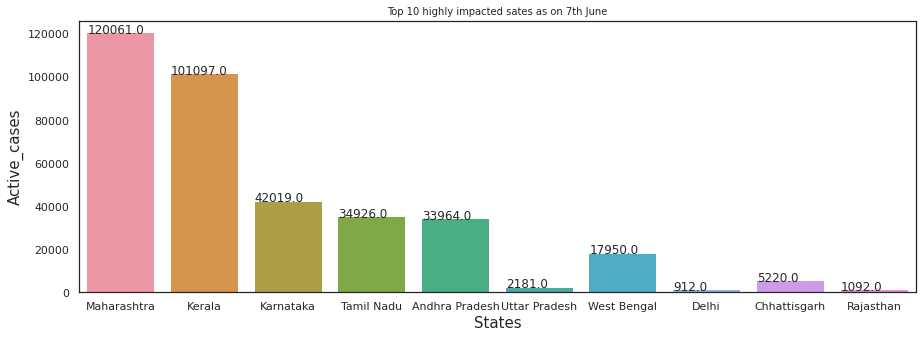

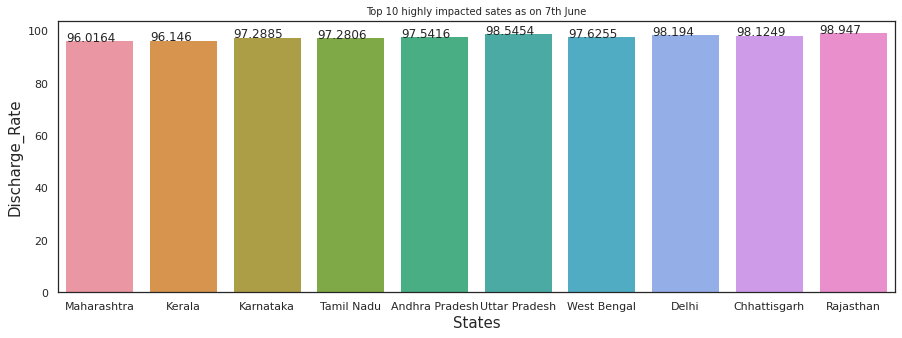

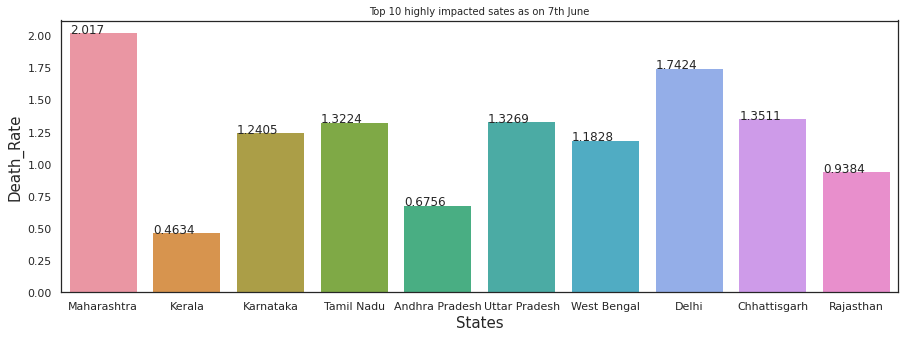

In [27]:
for feature in top_cases[['Confirmed','Cured','Deaths','Active_cases','Discharge_Rate','Death_Rate']]:
    fig=plt.figure(figsize=(15,5))
    plt.title("Top 10 highly impacted sates as on 7th June", size=10)
    ax=sns.barplot(data=top_cases,y=top_cases[feature],x='States', linewidth=0, edgecolor='black')
    plt.xlabel('States', size = 15)
    plt.ylabel(feature, size = 15)
    for i in ax.patches:
        ax.text(x=i.get_x(),y=i.get_height(),s=i.get_height())
plt.show()

In [28]:
states=['Kerala', 'Tamil Nadu', 'Maharashtra', 'Tamil Nadu', 'Andhra Pradesh', 'Uttar Pradesh']
mh=df[df['States']=='Maharashtra']
kl=df[df['States']=='Kerala']
ka=df[df['States']=='Karnataka']
tn=df[df['States']=='Tamil Nadu']
ap=df[df['States']=='Andhra Pradesh']
up=df[df['States']=='Uttar Pradesh']

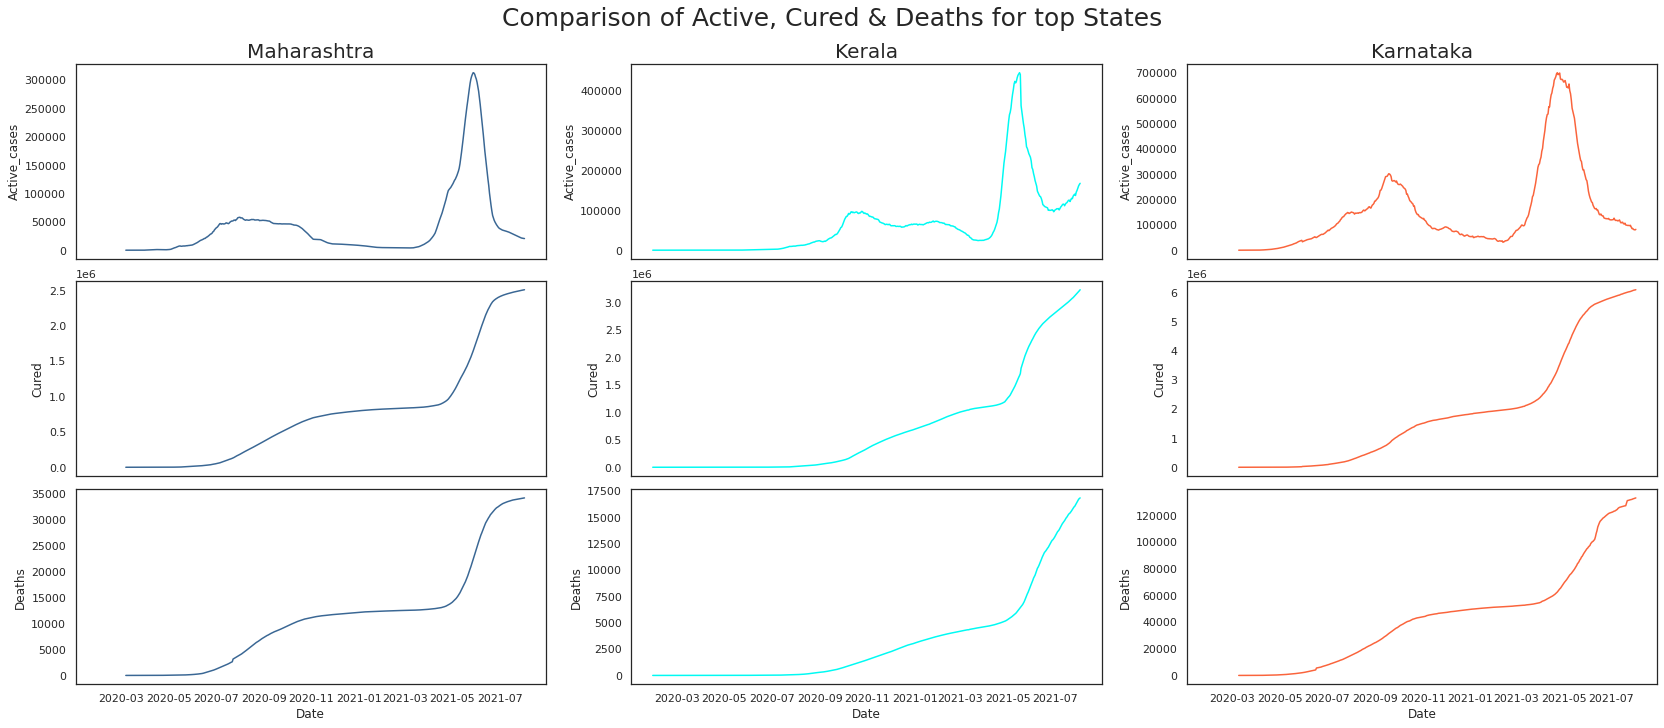

In [29]:
fig, ax=plt.subplots(nrows=3, ncols=3, figsize=(23,10), squeeze=False, sharex=True, sharey=False, constrained_layout=True )
plt.suptitle("Comparison of Active, Cured & Deaths for top States", size = 25)
sns.lineplot(data=tn, x='Date',y='Active_cases', ax=ax[0,0], color=colors[1])
ax[0,0].set_title("Maharashtra", size=20)
sns.lineplot(data=tn, x='Date',y='Cured', ax=ax[1,0], color=colors[1])
sns.lineplot(data=tn, x='Date',y='Deaths', ax=ax[2,0], color=colors[1])

sns.lineplot(data=kl, x='Date',y='Active_cases', ax=ax[0,1], color=colors[2])
ax[0,1].set_title("Kerala", size=20)
sns.lineplot(data=kl, x='Date',y='Cured', ax=ax[1,1], color=colors[2])
sns.lineplot(data=kl, x='Date',y='Deaths', ax=ax[2,1], color=colors[2])

sns.lineplot(data=mh, x='Date',y='Active_cases', ax=ax[0,2], color=colors[3])
ax[0,2].set_title("Karnataka", size=20)
sns.lineplot(data=mh, x='Date',y='Cured', ax=ax[1,2], color=colors[3])
sns.lineplot(data=mh, x='Date',y='Deaths', ax=ax[2,2], color=colors[3])
plt.show()

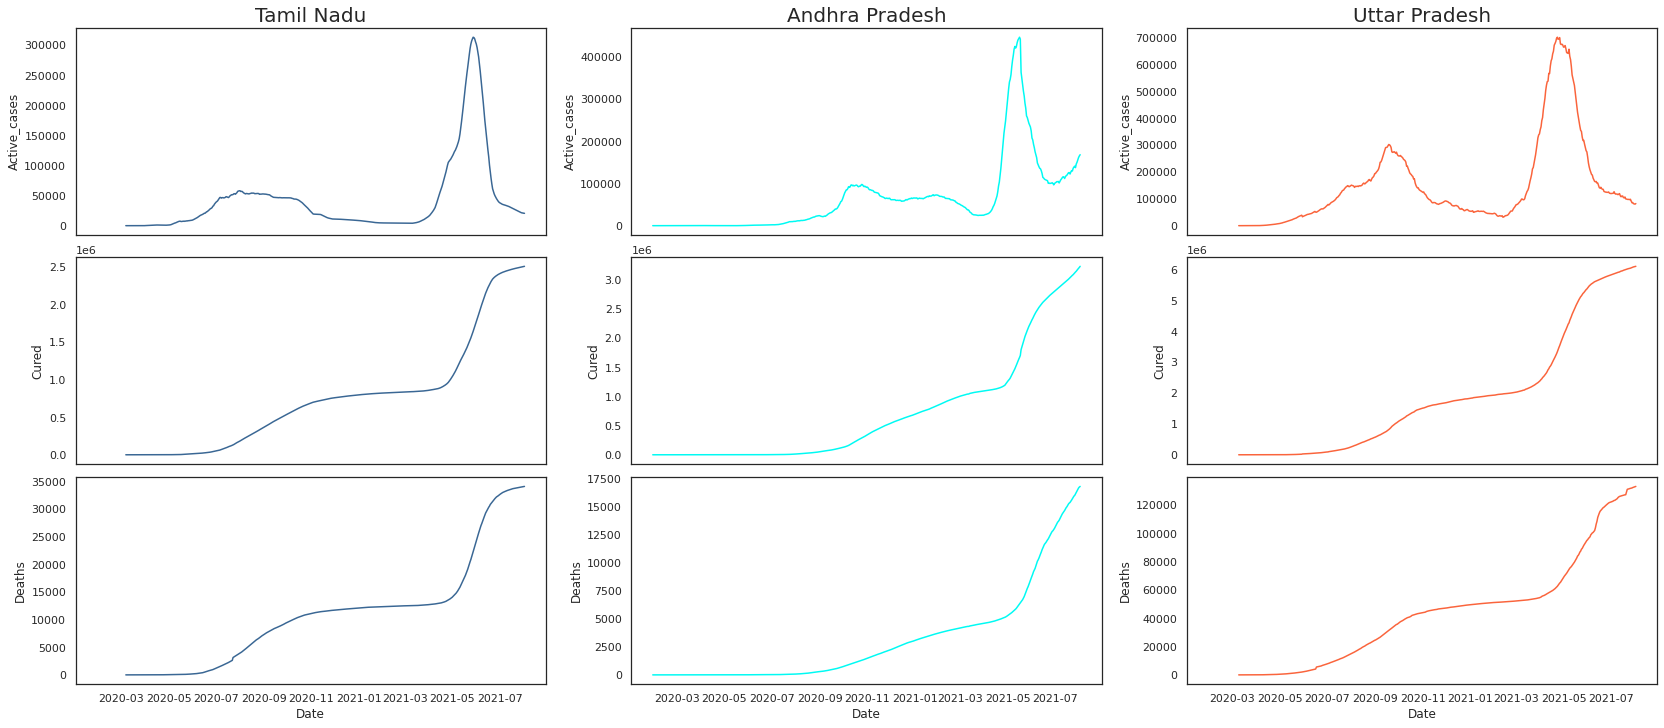

In [30]:
fig, ax=plt.subplots(nrows=3, ncols=3, figsize=(23,10), squeeze=False, sharex=True, sharey=False, constrained_layout=True )
sns.lineplot(data=tn, x='Date',y='Active_cases', ax=ax[0,0], color=colors[1])
ax[0,0].set_title("Tamil Nadu", size=20)
sns.lineplot(data=tn, x='Date',y='Cured', ax=ax[1,0], color=colors[1])
sns.lineplot(data=tn, x='Date',y='Deaths', ax=ax[2,0], color=colors[1])

sns.lineplot(data=kl, x='Date',y='Active_cases', ax=ax[0,1], color=colors[2])
ax[0,1].set_title("Andhra Pradesh", size=20)
sns.lineplot(data=kl, x='Date',y='Cured', ax=ax[1,1], color=colors[2])
sns.lineplot(data=kl, x='Date',y='Deaths', ax=ax[2,1], color=colors[2])

sns.lineplot(data=mh, x='Date',y='Active_cases', ax=ax[0,2], color=colors[3])
ax[0,2].set_title("Uttar Pradesh", size=20)
sns.lineplot(data=mh, x='Date',y='Cured', ax=ax[1,2], color=colors[3])
sns.lineplot(data=mh, x='Date',y='Deaths', ax=ax[2,2], color=colors[3])
plt.show()

In [31]:
df['Date']= pd.to_datetime(df['Date'])          
data_20 = df[df['Date'].dt.year==2020]                  
data_21 = df[df['Date'].dt.year==2021]              

data_20['Month']=data_20['Date'].dt.month                    
data_21['Month']=data_21['Date'].dt.month    


data_confirm_20= data_20['Confirmed'].groupby(data_20['Month']).sum()
data_dis_20= data_20['Cured'].groupby(data_20['Month']).sum()      
data_death_20= data_20['Deaths'].groupby(data_20['Month']).sum()

#Year 2021
data_confirm_21= data_21['Confirmed'].groupby(data_21['Month']).sum()
data_dis_21= data_21['Cured'].groupby(data_21['Month']).sum()      
data_death_21= data_21['Deaths'].groupby(data_21['Month']).sum()

cols_20=[data_confirm_20,data_dis_20,data_death_20]
data_20=pd.concat(cols_20,axis=1)  

cols_21=[data_confirm_21,data_dis_21,data_death_21]
data_21=pd.concat(cols_21,axis=1) 

#Year 2020
data_20['discharge_rate_20'] = np.round((data_20['Cured']/data_20['Confirmed'])*100, decimals=4)      
data_20['death_rate_20'] = np.round((data_20['Deaths']/data_20['Confirmed'])*100, decimals=4)

#Year 2020
data_21['discharge_rate_21'] = np.round((data_21['Cured']/data_21['Confirmed'])*100, decimals=4)      
data_21['death_rate_21'] = np.round((data_21['Deaths']/data_21['Confirmed'])*100, decimals=4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
#Year 2020
data_20.reset_index(inplace=True)
data_20.head()

,Month,Confirmed,Cured,Deaths,discharge_rate_20,death_rate_20
0,1,2,0,0,0.0000,0.0000
1,2,86,0,0,0.0000,0.0000
2,3,9687,808,202,8.3411,2.0853
3,4,422442,75443,13270,17.8588,3.1413
4,5,2938234,1133341,89834,38.5722,3.0574


In [33]:
#Year 2021
data_21.reset_index(inplace=True)
data_21.head()

,Month,Confirmed,Cured,Deaths,discharge_rate_21,death_rate_21
0,1,326469747,315332019,4709167,96.5884,1.4425
1,2,305631803,297133802,4359434,97.2195,1.4264
2,3,356305616,342610397,4935253,96.1563,1.3851
3,4,440660671,384990190,5340298,87.3666,1.2119
4,5,751927486,645106765,8390917,85.7937,1.1159


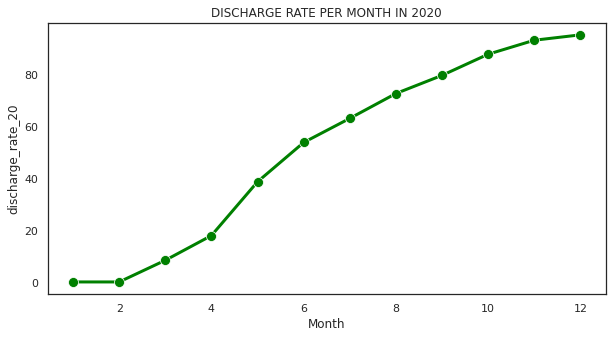

In [34]:
plt.figure(figsize=(10,5))
sns.lineplot(x="Month",y="discharge_rate_20",data=data_20,color="g",lw=3,marker='o',markersize=10)
plt.title('DISCHARGE RATE PER MONTH IN 2020')
plt.show()

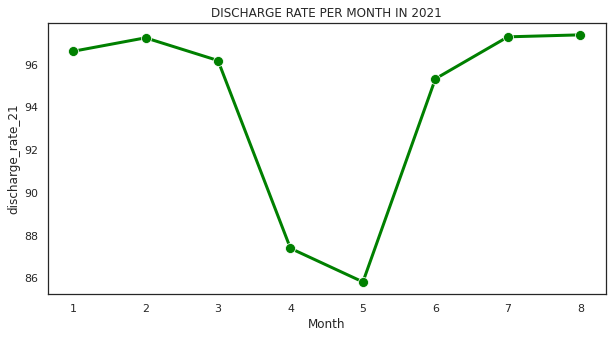

In [35]:
plt.figure(figsize=(10,5))
sns.lineplot(x="Month",y="discharge_rate_21",data=data_21,color="g",lw=3,marker='o',markersize=10)
plt.title('DISCHARGE RATE PER MONTH IN 2021')
plt.show()

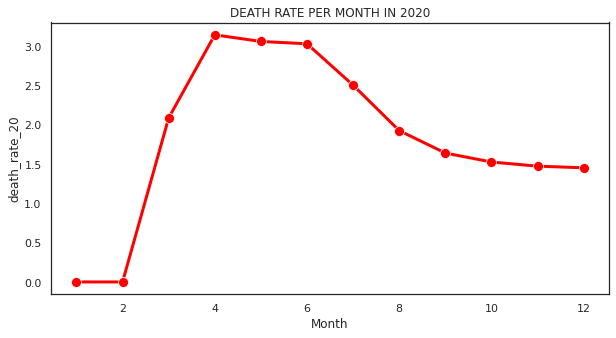

In [36]:
plt.figure(figsize=(10,5))
sns.lineplot(x="Month",y="death_rate_20",data=data_20,color="r",lw=3,marker='o',markersize=10)
plt.title('DEATH RATE PER MONTH IN 2020')
plt.show()

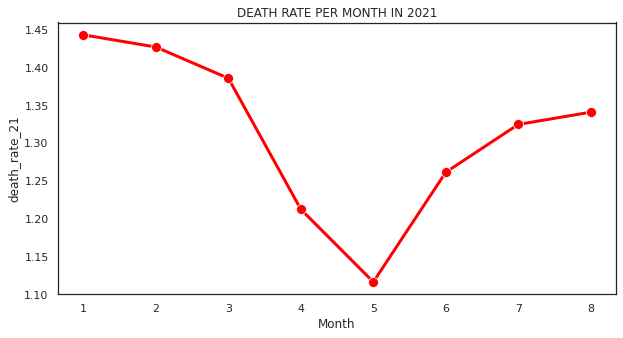

In [37]:
plt.figure(figsize=(10,5))
sns.lineplot(x="Month",y="death_rate_21",data=data_21,color="r",lw=3,marker='o',markersize=10)
plt.title('DEATH RATE PER MONTH IN 2021')
plt.show()

In [38]:
tn=df[df['States']=='Tamil Nadu']['Cured']
mh=df[df['States']=='Maharashtra']['Cured']
kl=df[df['States']=='Kerala']['Cured']

In [39]:
df.head()

,Sno,Date,States,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active_cases,Discharge_Rate,Death_Rate
0,1,2020-01-30,Kerala,1,0,0,0,1,1,0.0,0.0
1,2,2020-01-31,Kerala,1,0,0,0,1,1,0.0,0.0
2,3,2020-02-01,Kerala,2,0,0,0,2,2,0.0,0.0
3,4,2020-02-02,Kerala,3,0,0,0,3,3,0.0,0.0
4,5,2020-02-03,Kerala,3,0,0,0,3,3,0.0,0.0


In [40]:
print('Total number of Active Covid-19 cases across India : {}'.format(max_confirmed_cases['Active_cases'].sum()))
top_cases = max_confirmed_cases.groupby('States')['Active_cases'].max().sort_values(ascending=False).to_frame()
top_cases.style.background_gradient(cmap='flare')

Total number of Active Covid-19 cases across India : 464357


,Active_cases
States,
Maharashtra,120061
Kerala,101097
Karnataka,42019
Tamil Nadu,34926
Andhra Pradesh,33964
Odisha,26347
Assam,23590
West Bengal,17950
Telangana,11704


In [58]:
vaccine_df = pd.read_csv('covid_vaccine_statewise.csv')

In [59]:
vacc_df=vaccine_df.copy()
vaccine_df = vaccine_df[['Updated On','State','Total Doses Administered','Total Sessions Conducted','First Dose Administered','Second Dose Administered','Male(Individuals Vaccinated)','Female(Individuals Vaccinated)','Transgender(Individuals Vaccinated)','Total Covaxin Administered','Total CoviShield Administered','Total Sputnik V Administered','18-45 years (Age)','45-60 years (Age)','60+ years (Age)','Total Individuals Vaccinated']]
vaccine_df.columns = ['Date','States','Total_Doses_Administered','Total_Sessions_Conducted','First_Dose_Administered','Second_Dose_Administered','Male_Vaccinated','Female_Vaccinated','Transgender_Vaccinated','Total_Covaxin_Administered','Total_CoviShield_Administered','Total_SputnikV_Administered','18-45_Years','45-60_Years','60+_Years','Total_Individuals_Vaccinated']
vaccine_df.head()

,Date,States,Total_Doses_Administered,Total_Sessions_Conducted,First_Dose_Administered,Second_Dose_Administered,Male_Vaccinated,Female_Vaccinated,Transgender_Vaccinated,Total_Covaxin_Administered,Total_CoviShield_Administered,Total_SputnikV_Administered,18-45_Years,45-60_Years,60+_Years,Total_Individuals_Vaccinated
0,16/01/2021,India,48276.0,3455.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,India,99449.0,13611.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,India,195525.0,17855.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,India,251280.0,25472.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,251280.0


In [60]:
#Checking the null values
vaccine_df.isnull().sum()

Date                                0
States                              0
Total_Doses_Administered          335
Total_Sessions_Conducted          336
First_Dose_Administered           336
Second_Dose_Administered          336
Male_Vaccinated                   336
Female_Vaccinated                 336
Transgender_Vaccinated            336
Total_Covaxin_Administered        336
Total_CoviShield_Administered     336
Total_SputnikV_Administered      4962
18-45_Years                      2522
45-60_Years                      2521
60+_Years                        2521
Total_Individuals_Vaccinated      336
dtype: int64

In [61]:
vaccine_df = vaccine_df[vaccine_df['Total_Individuals_Vaccinated'].notna()]

In [62]:
vaccine_df['Date'] = pd.to_datetime(vaccine_df['Date'], format = '%d/%m/%Y')
latest_date = max(vaccine_df['Date'])
print("Current Date : ", latest_date)

Current Date :  2021-07-06 00:00:00


In [63]:
vaccine_df[vaccine_df['States'] == "Dadra and Nagar Haveli and Daman and Diu"]

,Date,States,Total_Doses_Administered,Total_Sessions_Conducted,First_Dose_Administered,Second_Dose_Administered,Male_Vaccinated,Female_Vaccinated,Transgender_Vaccinated,Total_Covaxin_Administered,Total_CoviShield_Administered,Total_SputnikV_Administered,18-45_Years,45-60_Years,60+_Years,Total_Individuals_Vaccinated
1450,2021-01-16,Dadra and Nagar Haveli and Daman and Diu,23.0,4.0,23.0,0.0,13.0,10.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,23.0
1451,2021-01-17,Dadra and Nagar Haveli and Daman and Diu,23.0,4.0,23.0,0.0,13.0,10.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,23.0
1452,2021-01-18,Dadra and Nagar Haveli and Daman and Diu,15.0,6.0,15.0,0.0,9.0,6.0,0.0,0.0,15.0,NaN,NaN,NaN,NaN,15.0
1453,2021-01-19,Dadra and Nagar Haveli and Daman and Diu,31.0,6.0,31.0,0.0,15.0,16.0,0.0,0.0,31.0,NaN,NaN,NaN,NaN,31.0
1454,2021-01-20,Dadra and Nagar Haveli and Daman and Diu,31.0,8.0,31.0,0.0,15.0,16.0,0.0,0.0,31.0,NaN,NaN,NaN,NaN,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,2021-07-02,Dadra and Nagar Haveli and Daman and Diu,452556.0,48502.0,407860.0,44696.0,299862.0,152594.0,100.0,12.0,452544.0,0.0,318307.0,97928.0,36321.0,407860.0
1618,2021-07-03,Dadra and Nagar Haveli and Daman and Diu,466349.0,52897.0,418716.0,47633.0,309600.0,156646.0,103.0,12.0,466337.0,0.0,328062.0,101390.0,36897.0,418716.0
1619,2021-07-04,Dadra and Nagar Haveli and Daman and Diu,470444.0,42737.0,422031.0,48413.0,312401.0,157939.0,104.0,12.0,470432.0,0.0,330921.0,102415.0,37108.0,422031.0
1620,2021-07-05,Dadra and Nagar Haveli and Daman and Diu,480984.0,47156.0,430117.0,50867.0,319716.0,161162.0,106.0,12.0,480972.0,0.0,338177.0,105079.0,37728.0,430117.0


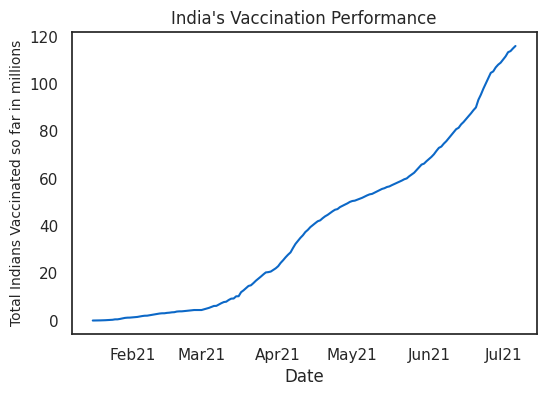

In [64]:
fig, ax = plt.subplots(ncols=1, nrows=1, dpi=100, figsize=(6,4))

sns.lineplot(data=vaccine_df[vaccine_df['States']=='India'], x='Date', y='Total_Individuals_Vaccinated', ax=ax)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(DateFormatter('%b%y'))
ax.set_ylabel('Total Indians Vaccinated so far in millions', fontsize=10)
ax.set_yticklabels([0,0,20,40,60,80,100,120])

Xstart, Xend = ax.get_xlim()
plt.title('India\'s Vaccination Performance')
plt.show()